In [2]:
# %% [markdown]
# # Cryptography Project: Caesar Cipher Analysis
# **Folder**: `Computer_Science_Mathematics/Cryptography/Notebooks/`  
# **Dataset**: `../Data/sample_text.txt`

In [3]:
# %% [markdown]
# ## 1. Import Libraries
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter



In [4]:
# %% [markdown]
# ## 2. Define Caesar Cipher Functions
def caesar_encrypt(text: str, shift: int) -> str:
    """Encrypt text using Caesar cipher"""
    encrypted = []
    for char in text:
        if char.isalpha():
            base = ord('A') if char.isupper() else ord('a')
            encrypted.append(chr((ord(char) - base + shift) % 26 + base))
        else:
            encrypted.append(char)
    return ''.join(encrypted)

def caesar_decrypt(ciphertext: str, shift: int) -> str:
    """Decrypt Caesar cipher text"""
    return caesar_encrypt(ciphertext, -shift)



In [5]:
# %% [markdown]
# ## 3. Load Sample Text
with open('../Data/sample1.txt', 'r') as f:
    original_text = f.read().lower()[:500]  # Use first 500 characters

print("Original Text:", original_text[:100] + "...")


Original Text: yfwyojfwnclkkbaluyudqtihyjymawdejwohryzcxmfetprweypeycsgrftmvdsmfnscoktfcdmhlhwbbokgqktritnplecfqlfv...


In [6]:

# %% [markdown]
# ## 4. Encrypt/Decrypt Demo
shift = 3
encrypted = caesar_encrypt(original_text, shift)
decrypted = caesar_decrypt(encrypted, shift)

print(f"\nEncrypted (shift={shift}):", encrypted[:100] + "...")
print("\nDecrypted:", decrypted[:100] + "...")




Encrypted (shift=3): bizbrmizqfonnedoxbxgtwlkbmbpdzghmzrkubcfapihwsuzhbshbfvjuiwpygvpiqvfrnwifgpkokzeernjtnwulwqsohfitoiy...

Decrypted: yfwyojfwnclkkbaluyudqtihyjymawdejwohryzcxmfetprweypeycsgrftmvdsmfnscoktfcdmhlhwbbokgqktritnplecfqlfv...


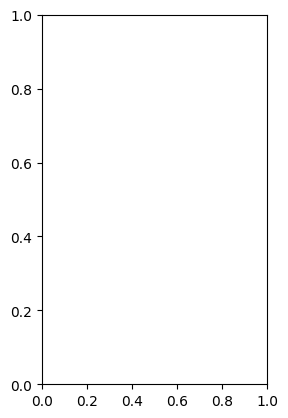

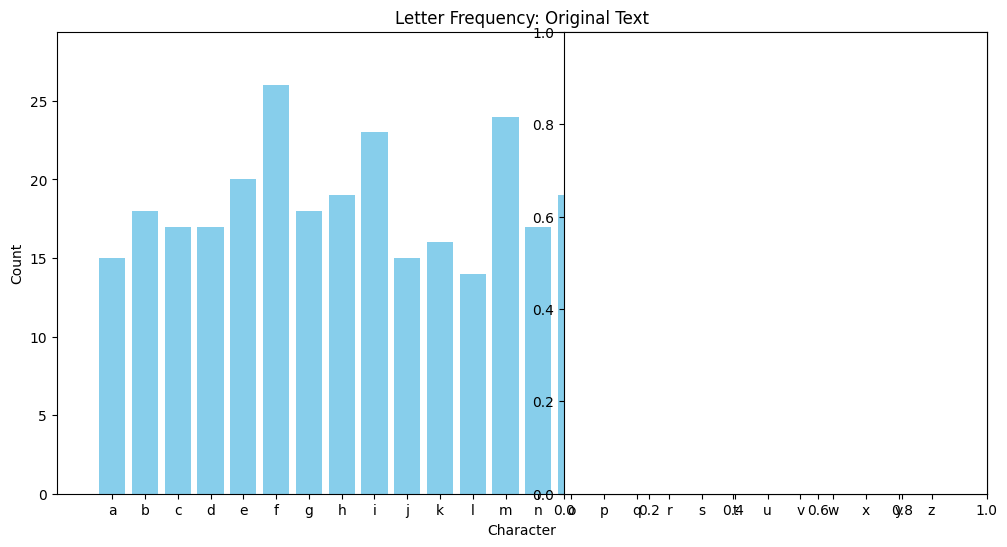

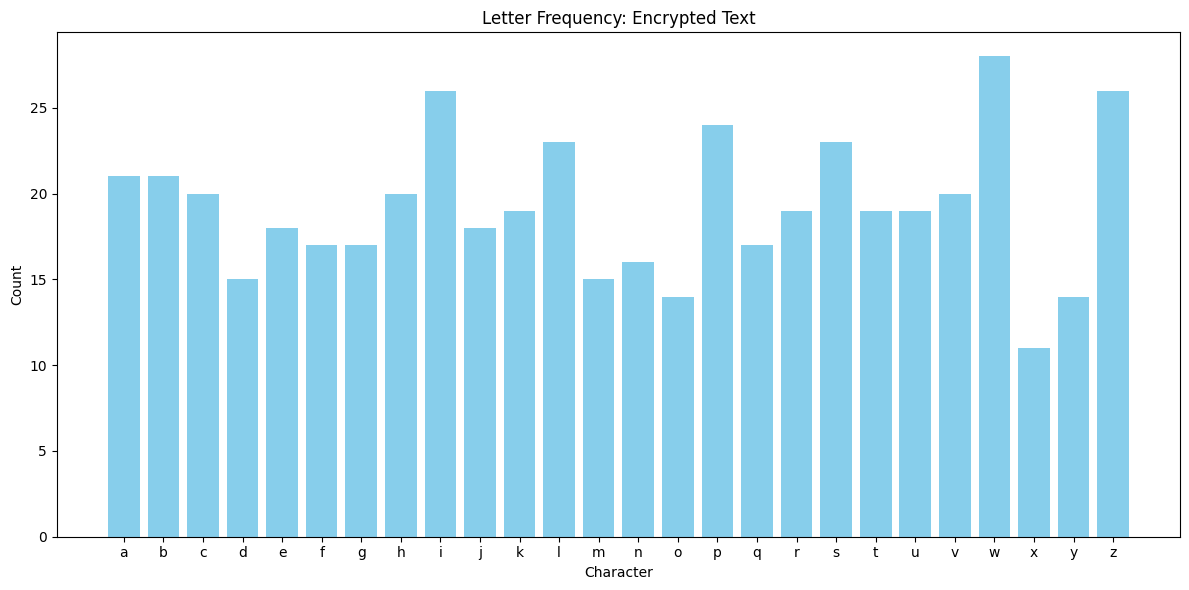

In [7]:
# %% [markdown]
# ## 5. Frequency Analysis Visualization
def plot_frequency(text: str, title: str):
    """Plot letter frequency distribution"""
    freq = Counter(c for c in text if c.isalpha())
    letters = sorted(freq.keys())
    counts = [freq[l] for l in letters]
    
    plt.figure(figsize=(12,6))
    plt.bar(letters, counts, color='skyblue')
    plt.title(f'Letter Frequency: {title}')
    plt.xlabel('Character')
    plt.ylabel('Count')

# Original vs Encrypted Frequencies
plt.subplot(1,2,1)
plot_frequency(original_text, 'Original Text')
plt.subplot(1,2,2)
plot_frequency(encrypted, 'Encrypted Text')
plt.tight_layout()
plt.savefig('../Outputs/Figures/caesar_frequency.png')  # Save plot
plt.show()



In [8]:
# %% [markdown]
# ## 6. Brute-Force Attack Simulation
print("\nBrute-force Decryption Attempts:")
for possible_shift in range(1, 26):
    attempt = caesar_decrypt(encrypted, possible_shift)
    print(f"Shift {possible_shift:2d}: {attempt[:50]}...")



Brute-force Decryption Attempts:
Shift  1: ahyaqlhypenmmdcnwawfsvkjalaocyfglyqjtabezohgvrtyga...
Shift  2: zgxzpkgxodmllcbmvzverujizkznbxefkxpiszadyngfuqsxfz...
Shift  3: yfwyojfwnclkkbaluyudqtihyjymawdejwohryzcxmfetprwey...
Shift  4: xevxnievmbkjjazktxtcpshgxixlzvcdivngqxybwledsoqvdx...
Shift  5: wduwmhdulajiizyjswsborgfwhwkyubchumfpwxavkdcrnpucw...
Shift  6: vctvlgctkzihhyxirvranqfevgvjxtabgtleovwzujcbqmotbv...
Shift  7: ubsukfbsjyhggxwhquqzmpedufuiwszafskdnuvytibaplnsau...
Shift  8: tartjearixgffwvgptpylodctethvryzerjcmtuxshazokmrzt...
Shift  9: szqsidzqhwfeevufosoxkncbsdsguqxydqiblstwrgzynjlqys...
Shift 10: ryprhcypgveddutenrnwjmbarcrftpwxcphakrsvqfyxmikpxr...
Shift 11: qxoqgbxofudcctsdmqmvilazqbqesovwbogzjqrupexwlhjowq...
Shift 12: pwnpfawnetcbbsrclpluhkzypapdrnuvanfyipqtodwvkginvp...
Shift 13: ovmoezvmdsbaarqbkoktgjyxozocqmtuzmexhopsncvujfhmuo...
Shift 14: nulndyulcrazzqpajnjsfixwnynbplstyldwgnormbutiegltn...
Shift 15: mtkmcxtkbqzyypozimirehwvmxmaokrsxkcvfmnqlatshdfksm...
Shift 

In [9]:
# %% [markdown]
# ## 7. Save Encrypted Text
with open('../Outputs/Texts/encrypted_message.txt', 'w') as f:
    f.write(encrypted)

In [10]:
from ipywidgets import interact
@interact(shift=(0,25))
def show_shift(shift=3):
    print(caesar_encrypt(original_text, shift))

ModuleNotFoundError: No module named 'ipywidgets'